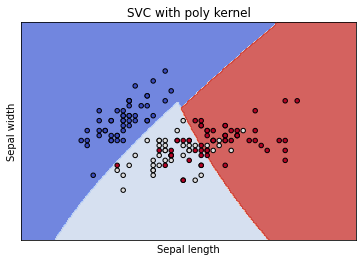

Accuracy: 82.00 %
Precision Score: 82.81 %
Recall Score: 82.64 %


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# split train and test 
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=50)


# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0 # SVM regularization parameter
models = svm.SVC(kernel='poly', degree=2.0, C=C, gamma='auto')
#models = svm.SVC(kernel='rbf', gamma=1000, C=C)
#models = svm.SVC(kernel='linear', C=C)

clf = models.fit(X, y)
fig, ax = plt.subplots()

# title for the plots
titles = ('SVC with poly kernel')
#titles = ('SVC with rbf kernel')
#titles = ('SVC with linear kernel')

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(titles)
plt.show()

models.fit(X_train, y_train)
y_pred = models.predict(X_test)
print("Accuracy: %.2f %%" %(100*accuracy_score(y_test, y_pred)))
print("Precision Score: %.2f %%" %  (100*precision_score(y_test,y_pred, average='macro')))
print("Recall Score: %.2f %%" %  (100*recall_score(y_test,y_pred, average='macro')))